Author: Nik Alleyne
Author Blog: www.securitynik.com


References:
https://rubikscode.net/2021/06/28/ml-optimization-pt-1-gradient-descent-with-python/
https://rubikscode.net/2020/07/20/back-to-machine-learning-basics-linear-regression-with-python-scikit-learn-tensorflow-and-pytorch/
https://rubikscode.net/2020/10/12/back-to-machine-learning-basics-regularization/
https://github.com/SecurityNik/Data-Science-and-ML/blob/main/Continuing%20Back%20Propagation%20-%20Gradient%20Descent%20-%20Tf%20GradientTape%20and%20PyTorch.ipynb
https://www.cl.cam.ac.uk/teaching/1819/DataSciII/lecture2.pdf
https://www.statology.org/scatterplot-with-regression-line-python/


Why the model may diverge
https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons
https://stackoverflow.com/questions/17628613/what-is-inf-and-nan

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [32]:
# Setup some fake data for simple linear regresion
p = np.array([[2], [3], [4], [5]])
q = np.array([5, 2, 1, 2])
p, q

(array([[2],
        [3],
        [4],
        [5]]),
 array([5, 2, 1, 2]))

In [33]:
# Stochastic Gradient Descent
# This class works with either single variables or multiple variables
class SimpleSGD:
    def __init__(self):
        ''' Setup the constructor '''
        self.bias = 0.
        self.weight = 0.
        self.history = []

    def fit(self, X, y, epochs=5, learning_rate=.001):
        ''' Perform the training '''
        n_samples = X.shape[0]

        # If it is only one feature, then reshape it so each sample falls 
        # in a separate vector, rather than the entire sample space being 
        # one big vector
        if len(X.shape) == 1:
            X = X.reshape(-1,1 )

        for epoch in range(epochs):
            # Tracking the overall cost 
            cost = 0
            for i in range(n_samples):
                #Use the next 3 lines if you wish to randomly choose a sample
                #index = np.random.randint(low=0, high=n_samples)
                #xi =X[index, :]
                #yi = y[index]

                # I choose this code beacause I wanted to validate with Tensorflow
                xi =X[i, :]
                yi = y[i]

                # Make a prediction
                y_pred = np.dot(self.weight, xi) + self.bias

                # Compute the loss using the squared error on each sample's prediction
                loss = (yi - y_pred)**2
                cost += loss
                
                # Find the partial derivatives of loss with respect to the weight and bias
                dl_dw = 2*(y_pred -yi) * xi
                dl_db = 2*(y_pred -yi)

                # Update the weigt and bias
                self.weight = self.weight - (learning_rate * dl_dw)
                self.bias = self.bias - (learning_rate * dl_db)
            
            # Print epoch at every 100 epochs
            if epoch %20 == 0:
                print(f'Epoch: {epoch}, cost: {cost}')

            #print(f'This is your bias: {self.bias}')
                
            cost /= n_samples
            self.history.append(cost)

        # When I tested with multiple variables, I noticed I was returning a 
        # vector of biases, one for each feature. This is wrong, there should be only 1 bias.
        # As a result, I'm going to cheat and just return the first entry in the weight vector
        # If you spot my error, please let me know
        return self.weight, self.bias[0]

    def predict(self, X):
        ''' Make a prediction '''
        return np.dot(X, self.weight) + self.bias


In [34]:
# Instantiate the model and train it on my simple one feature toy data
sgd = SimpleSGD()
sgd.fit(p, q, epochs=5, learning_rate=0.001)

Epoch: 0, cost: [32.67591162]


(array([0.22489613]), 0.0808132785931794)

In [35]:
# Make a prediction using my algorithm
# This will be compared to Tensorflow
sgd.predict([10.])

array([2.32977462])

In [36]:
# Import Tensorflow library to validate this activity
import tensorflow as tf

In [37]:
# Verify above with Tensorflow
# Build the linear model using Tensorflow
# Initialize the weights and bias to 0
model = tf.keras.Sequential(name='SimpleSGD_Validation')
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,), use_bias=True, bias_initializer=tf.zeros_initializer, kernel_initializer=tf.zeros_initializer, name='SimpleSGD_Input'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mse')

# Remove the comment from the next line if you wish to see the model summary
#model.summary()

# Fit the model on 5 epochs, set the batch size to 1 and turn off shuffling.
# By tunring off shufffling, this ensures that Tensorflow is sampling sequentially
# This matches what I have in my own code and thus works to ensure I did the manual code correctly
history = model.fit(x=p, y=q, epochs=5, batch_size=1, shuffle=False, verbose=0)

# Get the weights and bias to confirm that the code above and calculations are correct
# As can be seen below, the weight and bias matches almost perfectly with the one produced from the manual code
# The 5 epochs with learning rate 0.001 matches
model.get_weights()


[array([[0.22489616]], dtype=float32), array([0.08081328], dtype=float32)]

In [38]:
# Make a prediction using Tensorflow, to confirm even further my solution works.
model.predict([10.])

array([[2.3297749]], dtype=float32)

Text(0, 0.5, 'Loss')

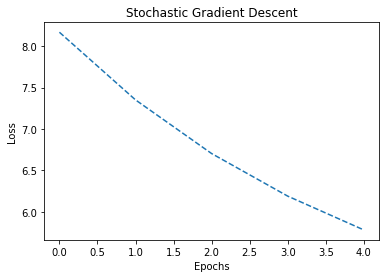

In [39]:
# With confirmation from Tensorflow that the calculations are correct
# Time to plot the loss
# Keep in mind, if we use random samples, this curve will more than likely go up and down
plt.title('Stochastic Gradient Descent')
plt.plot(sgd.history, '--')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [40]:
# Test this against a realworld dataset
df = pd.read_csv(filepath_or_buffer=r'C:\ML\conn.log', header=None)
df = df.dropna()

# Split the data into X and labels
X_data = df.values[:, :-1]
y_labels = df.values[:, -1]

# Scale the data. Gradient descent works best with scaled values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_data)
X_data

array([[2.09867954e-02, 3.10000000e+01, 1.75000000e+02, 1.00000000e+00,
        5.90000000e+01, 1.00000000e+00],
       [5.90992050e+01, 2.74840000e+04, 0.00000000e+00, 2.00000000e+01,
        2.80440000e+04, 0.00000000e+00],
       [5.88893890e-05, 5.45600000e+03, 0.00000000e+00, 4.00000000e+00,
        5.56800000e+03, 0.00000000e+00],
       ...,
       [1.71661377e-05, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.20000000e+01, 1.00000000e+00],
       [1.13511086e-02, 3.00000000e+01, 1.23000000e+02, 1.00000000e+00,
        5.80000000e+01, 1.00000000e+00],
       [1.87020302e-02, 3.00000000e+01, 1.23000000e+02, 1.00000000e+00,
        5.80000000e+01, 1.00000000e+00]])

In [41]:
# Instantitate the class
sgd = SimpleSGD()
sgd.fit(x_scaled, y_labels, epochs=5, learning_rate=0.001)


Epoch: 0, cost: [1.33702442e+20 1.33702442e+20 1.33702442e+20 1.33702442e+20
 1.33702442e+20 1.33702442e+20]


(array([-3.58573715e+14,  6.28690323e+13,  4.15609820e+14, -5.96739239e+14,
        -3.62878508e+13, -5.86717219e+14]),
 -35250135846698.93)

In [42]:
# FINAL VALIDATION - Build the linear model using Tensorflow 
# Initialize the weights and bias to 0
# This time the test uses real world data
model = tf.keras.Sequential(name='SimpleSGD_vValidation')
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(6,), use_bias=True, bias_initializer=tf.zeros_initializer, kernel_initializer=tf.zeros_initializer, name='SimpleSGD_Input'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mse')

# Enable the next line if you wish to see the model's summary
#model.summary()

# Fit the model on 5 epochs, set the batch size to 1 and turn off shuffling.
# By tunring off shufffling, this ensure that Tensorflow is sampling sequentially
# This matches what I have in my own code and thus works to ensure I did the manual code correctly
history = model.fit(x_scaled, y_labels, epochs=5, batch_size=1, shuffle=False, verbose=0)

# Get the weights and bias to confirm that the code above and calculations are correct for real world datasets
# As can be seen below, the weight and bias matches almost perfectly with the one produced from the manual code
# The 5 epochs with learning rate 0.001 matches
model.get_weights()


[array([[-3.5857773e+14],
        [ 6.2869618e+13],
        [ 4.1561274e+14],
        [-5.9674631e+14],
        [-3.6288330e+13],
        [-5.8672240e+14]], dtype=float32),
 array([-3.5250537e+13], dtype=float32)]

In [43]:
# Training on two features so I can ultimately plot them
# Instantitate the class
sgd = SimpleSGD()
w, b = sgd.fit(x_scaled[:, 0], y_labels, epochs=5, learning_rate=0.001)
w, b


Epoch: 0, cost: [2.1278509e+17]


(array([-11678.11030523]), 20125.131099025602)

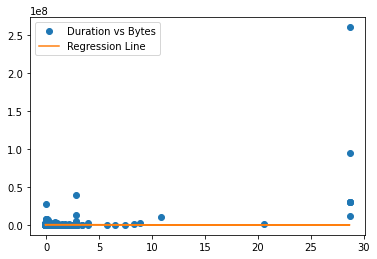

In [44]:
# Plot of Duration vs resp bytes
plt.plot(x_scaled[:, 0], y_labels, 'o', label='Duration vs Bytes')
plt.plot(x_scaled[:, 0], x_scaled[:, 0] * w+b, label='Regression Line' )
plt.legend(loc='best')

In [45]:
# Awesome, my code is validated against Tensorflow. This suggests that this was well done!
# There is always opportunities for improvements but being able to validate your work with a tool such as Tensorflow is an important takeaway
# Moving on ...